In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,StratifiedKFold


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Janta Hackathons/Mobility Analytics/train_Wc8LBpr.csv")
test  = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Janta Hackathons/Mobility Analytics/test_VsU9xXK.csv")

In [4]:
train.shape

(131662, 14)

In [5]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [6]:
train.Trip_ID.nunique(), test.Trip_ID.nunique()

(131662, 87395)

In [0]:
Submission = test[['Trip_ID']]
train.drop('Trip_ID',axis=1,inplace=True)
test.drop('Trip_ID',axis=1,inplace=True)

In [8]:
df=pd.concat([train,test])
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [0]:
df.shape

(219057, 13)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                219057 non-null  float64
 1   Type_of_Cab                  185689 non-null  object 
 2   Customer_Since_Months        209171 non-null  float64
 3   Life_Style_Index             185537 non-null  float64
 4   Confidence_Life_Style_Index  185537 non-null  object 
 5   Destination_Type             219057 non-null  object 
 6   Customer_Rating              219057 non-null  float64
 7   Cancellation_Last_1Month     219057 non-null  int64  
 8   Var1                         101238 non-null  float64
 9   Var2                         219057 non-null  int64  
 10  Var3                         219057 non-null  int64  
 11  Gender                       219057 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  float64
dtype

In [0]:
df.isna().sum()/df.shape[0]

Trip_Distance                  0.000000
Type_of_Cab                    0.152326
Customer_Since_Months          0.045130
Life_Style_Index               0.153020
Confidence_Life_Style_Index    0.153020
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.537846
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
Surge_Pricing_Type             0.398960
dtype: float64

Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Var1 have missing values

**Trip** **Distance**

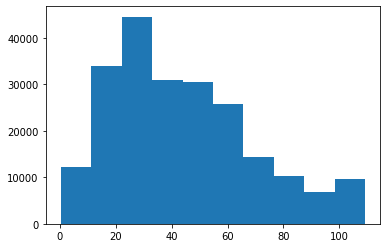

In [0]:
plt.hist(df.Trip_Distance)
plt.show()

Most customers take cab for distances between 20-60 km while there a few who have taken cab for >=100 km

**Type of Cab** 

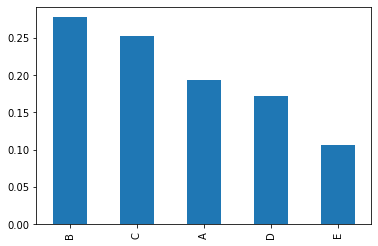

In [0]:
df.Type_of_Cab.value_counts(1).plot.bar()
plt.show()

B type of cab is most used  and E being the least used

**Customer since months**


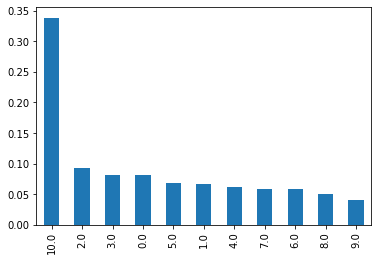

In [0]:
df.Customer_Since_Months.value_counts(1).plot.bar()
plt.show()

Majority of customers are old customers.It can also be said Sigma has been good at retaining customers

**Life_Style_Index**              

In [0]:
df.Life_Style_Index.value_counts()

2.77608    18
2.70697    18
2.77677    18
2.78465    18
2.77957    17
           ..
2.92133     1
2.47286     1
2.49589     1
3.09877     1
3.06602     1
Name: Life_Style_Index, Length: 69677, dtype: int64

In [0]:
df.Life_Style_Index.max()

4.87511

In [0]:
df.Life_Style_Index.min()

1.31785

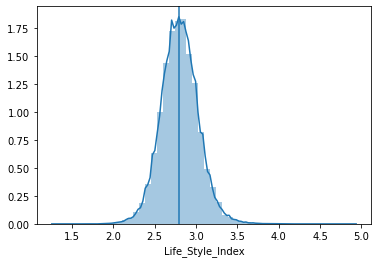

In [0]:
sns.distplot(df.Life_Style_Index)
plt.axvline(x=df.Life_Style_Index.median())
plt.show()

Life style index is normally distributed with low standard deviation

**Confidence_Life_Style_Index**

In [0]:
df.Confidence_Life_Style_Index.value_counts(1)

B    0.362542
C    0.321963
A    0.315495
Name: Confidence_Life_Style_Index, dtype: float64

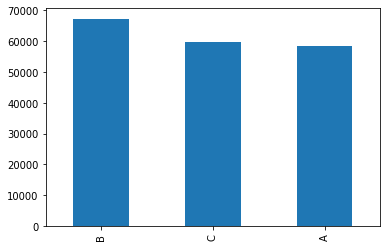

In [0]:
df.Confidence_Life_Style_Index.value_counts().plot.bar()
#plt.axvline(x=df.Confidence_Life_Style_Index.median())
plt.show()

**Destination_Type**

In [0]:
df.Destination_Type.value_counts()

A    129010
B     49193
C     12397
D     11085
E      4549
F      3222
G      2513
H      2124
I      1334
J      1166
K      1102
L      1052
M       160
N       150
Name: Destination_Type, dtype: int64

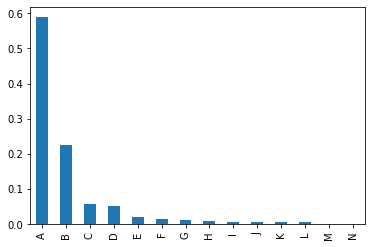

In [0]:
df.Destination_Type.value_counts(1).plot.bar()
plt.show()

Majority  of rides are categorized as  destination A, almost 60%

**Customer_Rating**

In [0]:
df.Customer_Rating.value_counts()

3.20000    199
2.75000    195
2.60000    191
3.50000    188
3.35000    176
          ... 
0.15250      1
0.49125      1
0.11125      1
0.03375      1
0.05500      1
Name: Customer_Rating, Length: 3976, dtype: int64

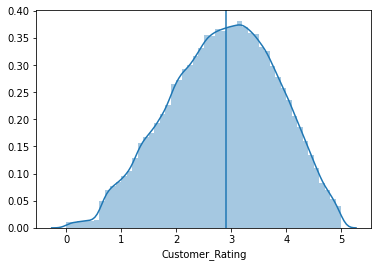

In [0]:
sns.distplot(df.Customer_Rating)
plt.axvline(x=df.Customer_Rating.median())
plt.show()

The distribution is slightly left skewed with median rating being close to 3

**Cancellation_Last_1Month**

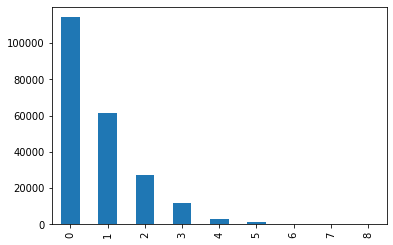

In [0]:
df.Cancellation_Last_1Month.value_counts().plot.bar()
plt.show()

Majority of customers have not canceled in the last one month but there is a signifiacnt % of customers with 1 cancellation

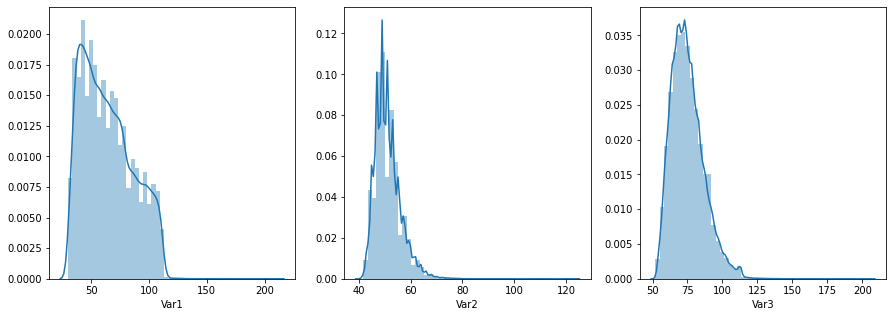

In [0]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df.Var1,ax=axes[0])
sns.distplot(df.Var2,ax=axes[1])
sns.distplot(df.Var3,ax=axes[2])
plt.show()


All 3 variables are positively skewed

**Gender**

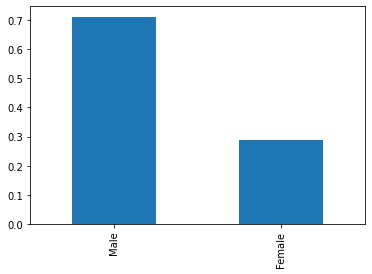

In [0]:
df.Gender.value_counts(1).plot.bar()
plt.show()

Almost 70% customers are male and 30% female


**Bivariate Analysis**

In [0]:
df.Surge_Pricing_Type.value_counts()

2.0    56728
3.0    47720
1.0    27214
Name: Surge_Pricing_Type, dtype: int64

In [0]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

**Trip Distance**

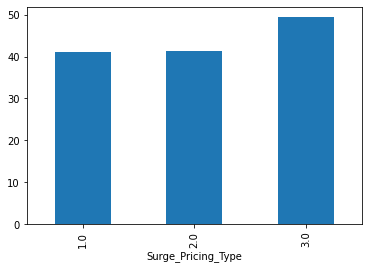

In [0]:
df.groupby('Surge_Pricing_Type')['Trip_Distance'].mean().plot.bar()

Customers with long distance ride generally have higher surge price ie 3 label

**Type_of_Cab**

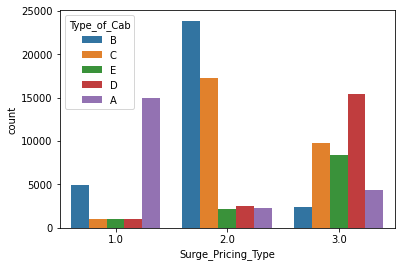

In [0]:
sns.countplot(df.Surge_Pricing_Type,hue=df.Type_of_Cab)
plt.show()

Different distribution for each surge price type. Seems like an important feature

**Life_Style_Index**

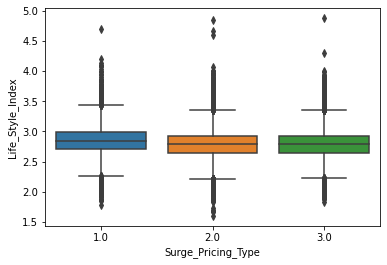

In [0]:
sns.boxplot(df.Surge_Pricing_Type,df.Life_Style_Index)
plt.show()

Surge price type seems to be independent of life style index as all three surge price type have almost similar distribution

**Confidence_Life_Style_Index**

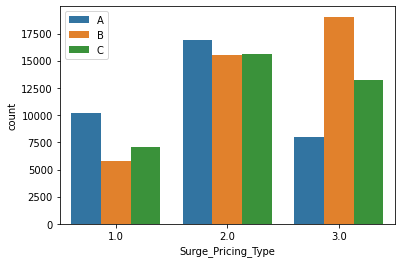

In [0]:
sns.countplot(df.Surge_Pricing_Type,hue=df.Confidence_Life_Style_Index)
plt.legend(loc='upper left')
plt.show()

Each surge price type has different count for confidence life style index.

**Destination_Type**

<function matplotlib.pyplot.show>

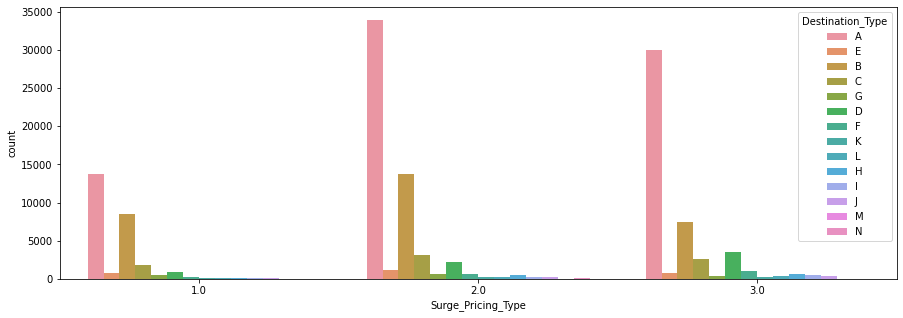

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.Surge_Pricing_Type,hue=df.Destination_Type)
plt.show

Similar distribution for all three surge price type

**Customer_Rating**

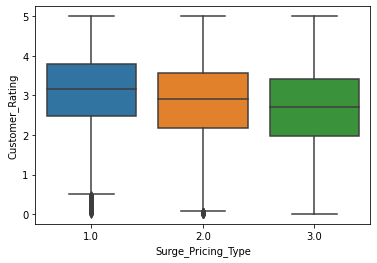

In [0]:
sns.boxplot(df.Surge_Pricing_Type,df.Customer_Rating)
plt.show()

Customers with high avg rating fall in surge price type 1 and relatively less rating fall in surge type 3


**Cancellation_Last_1Month**

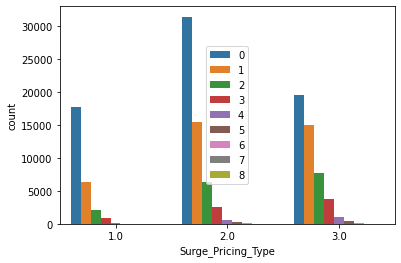

In [0]:
sns.countplot(df.Surge_Pricing_Type,hue=df.Cancellation_Last_1Month)
plt.legend(loc='center')
plt.show()

**Customer_Since_Months**

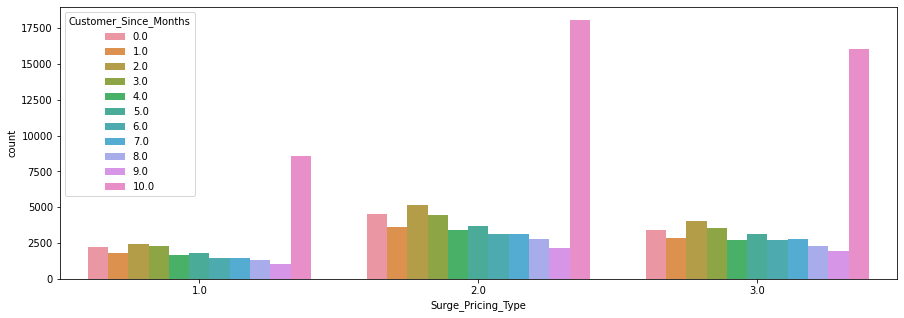

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df.Surge_Pricing_Type,hue=df.Customer_Since_Months)
#plt.legend(loc='center')
plt.show()

Surge price type 2 has highest number of oldest customer ie 10 months. Distribution is similar for all 3 surge price type

**Gender**

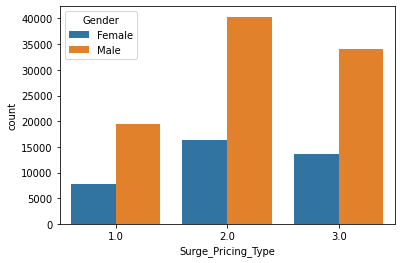

In [0]:
sns.countplot(df.Surge_Pricing_Type,hue=df.Gender)
#plt.legend(loc='center')
plt.show()

In each surge price type males to female ratio is same. not an important feature

In [0]:
df.groupby('Surge_Pricing_Type')['Gender'].apply(lambda x:x.value_counts(1))

Surge_Pricing_Type        
1.0                 Male      0.714926
                    Female    0.285074
2.0                 Male      0.710848
                    Female    0.289152
3.0                 Male      0.714983
                    Female    0.285017
Name: Gender, dtype: float64

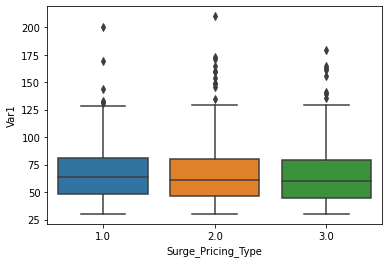

In [0]:
sns.boxplot(df.Surge_Pricing_Type,df.Var1)

plt.show()


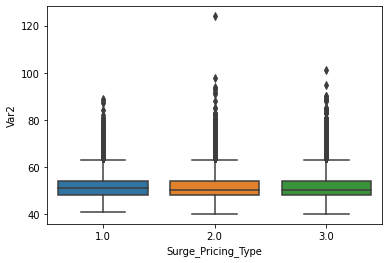

In [0]:
sns.boxplot(df.Surge_Pricing_Type,df.Var2)


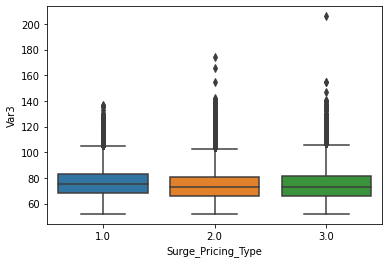

In [0]:
sns.boxplot(df.Surge_Pricing_Type,df.Var3)

In [0]:
#All three have same distribution with respect to surge price type so not important

Missing value imputation and conversion of categorical to numerical columns

In [0]:
df.isnull().sum()/df.shape[0]

Trip_Distance                  0.000000
Type_of_Cab                    0.152326
Customer_Since_Months          0.045130
Life_Style_Index               0.153020
Confidence_Life_Style_Index    0.153020
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.537846
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
Surge_Pricing_Type             0.398960
dtype: float64

In [0]:
#Since var1 has 50 % missing values so we drop it
df.drop(columns='Var1',inplace=True)

In [0]:
df.Type_of_Cab.fillna(method='bfill',inplace=True)
df.Customer_Since_Months.fillna(value=df.Customer_Since_Months.mode()[0],inplace=True)
df.Life_Style_Index.fillna(method='bfill',inplace=True)
df.Confidence_Life_Style_Index.fillna(method='bfill',inplace=True)

In [0]:
df.Type_of_Cab=df.Type_of_Cab.map({'A':1,'B':2,'C':3,'D':4,'E':5})

In [0]:
df.Confidence_Life_Style_Index=df.Confidence_Life_Style_Index.map({'A':1,'B':2,'C':3})

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Destination_Type=le.fit_transform(df.Destination_Type)

In [14]:
df.Gender.value_counts()

Male      156128
Female     62929
Name: Gender, dtype: int64

In [0]:
df.Gender=df.Gender.map({'Male':0,'Female':1})

In [0]:
df.reset_index(drop=True,inplace=True)

In [17]:
for i in range(len(df.Customer_Rating)):
    #print(i)
    if df['Customer_Rating'][i]<=1:
        df['Customer_Rating'][i]=1
    elif ((df['Customer_Rating'][i]>1) & (df['Customer_Rating'][i]<=2)):
        df['Customer_Rating'][i]=2
    elif( (df['Customer_Rating'][i]>2) & (df['Customer_Rating'][i]<=3)):
        df['Customer_Rating'][i]=3
    elif ((df['Customer_Rating'][i]>3) & (df['Customer_Rating'][i]<=4)):
        df['Customer_Rating'][i]=4
    else:
        df['Customer_Rating'][i]=5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [0]:
df.Customer_Rating.value_counts()

4.0    72956
3.0    72698
2.0    37722
5.0    27969
1.0     7712
Name: Customer_Rating, dtype: int64

In [0]:
df.select_dtypes('number').columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

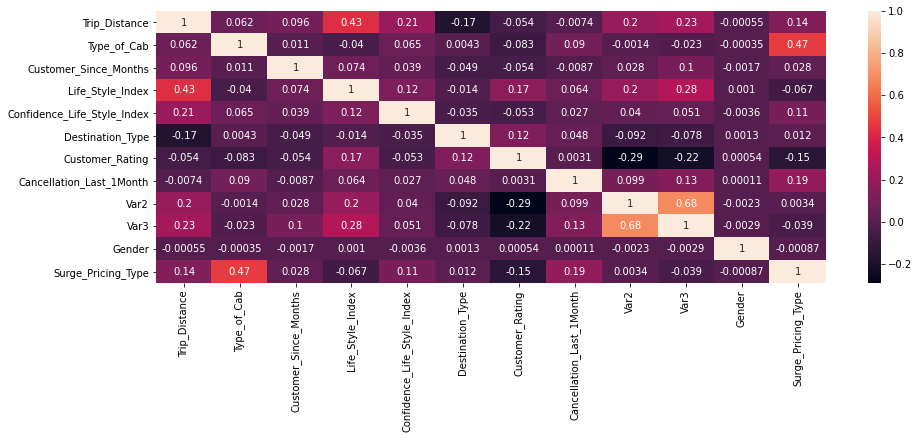

In [0]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [0]:
#Type of cab is the highest correlated feature with surge_pricing value

Using VIF for multicollinearity

In [0]:
train_len=train.shape[0]
X=df.drop(columns='Surge_Pricing_Type')
Y=df.Surge_Pricing_Type
X_train=X[:train_len]
X_test=X[train_len:]
Y_train=Y[:train_len]

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_train.values, j) for j in range( X_train.shape[1])],index=X_train.columns)

Trip_Distance                    4.916059
Type_of_Cab                      5.666452
Customer_Since_Months            3.967804
Life_Style_Index               129.594362
Confidence_Life_Style_Index      7.618345
Destination_Type                 1.340431
Customer_Rating                 13.455707
Cancellation_Last_1Month         1.615690
Var2                           152.688996
Var3                            84.922652
Gender                           1.400061
dtype: float64

In [0]:
def calculate_vif(x):
    thresh=10.0
    output=x
    k=x.shape[1]
    vif=[variance_inflation_factor(x.values,j) for j in range(x.shape[1])]
    for i in range(1,k):#till k cz atleast one column would be kept even if its greater than 5
        print('iteration no',i)
        print(vif)
        a=np.argmax(vif)
        print('max vif is for variable no',a)
        print(" ")
        if vif[a]<=thresh:
            break
        else:
            output=output.drop(output.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return output

In [21]:
X_vif=calculate_vif(X_train)

iteration no 1
[4.916059275400198, 5.6664515319141735, 3.9678037745205708, 129.59436210085258, 7.618345391405841, 1.340430756418971, 13.455707224774688, 1.6156902745714328, 152.68899643072066, 84.92265231221944, 1.400060762422293]
max vif is for variable no 8
 
iteration no 2
[4.806311252260624, 5.584587497642123, 3.963810395026467, 86.31494138137089, 7.597447700292421, 1.3397286922367637, 13.319260865029321, 1.6149162191749429, 47.825134350843186, 1.3993405875391463]
max vif is for variable no 3
 
iteration no 3
[4.548679812829974, 5.360586713159562, 3.910312058745589, 7.22372717942983, 1.3322701881031884, 8.65637628968264, 1.614209538213636, 17.859170212037476, 1.3944597601771915]
max vif is for variable no 7
 
iteration no 4
[4.135859533994208, 4.9177905976108836, 3.571645470065596, 6.453918264781171, 1.3293118826440276, 6.680366879156057, 1.572952049305726, 1.3821190779682548]
max vif is for variable no 5
 


In [22]:
X_vif.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender
0,6.77,2,1.0,1,0,4.0,0,1
1,29.47,2,10.0,2,0,4.0,0,0
2,41.58,3,10.0,2,4,4.0,2,0
3,61.56,3,10.0,2,0,4.0,0,0
4,54.95,3,10.0,2,0,4.0,4,0


In [0]:
X_train_dup=X_train.copy()
X_train_dup=X_vif

In [86]:
X_train_dup.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Confidence_Life_Style_Index', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Gender'],
      dtype='object')

In [0]:
X_test=X_test[['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Confidence_Life_Style_Index', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Gender']]

In [103]:
from scipy.stats import randint as sp_randint
a=sp_randint(10,50)
print(a)

In [25]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier(random_state=1)
params={'n_estimators':sp_randint(50,250),
       'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(2,20),
       'min_samples_split':sp_randint(2,20),
       'criterion':['gini','entropy'],
       'max_features':['log2','sqrt']
       }
rsearch=RandomizedSearchCV(rf,param_distributions=params,cv=8,scoring='accuracy',n_jobs=-1)
rsearch.fit(X_train_dup,Y_train)

RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [105]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 128}

In [106]:
rsearch.best_score_

0.6748567910305076

In [0]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score,precision_score

In [30]:
rf=RandomForestClassifier(**rsearch.best_params_,random_state=1)
rf.fit(X_train_dup,Y_train)
y_train_pred=rf.predict(X_train_dup)
y_train_prob=rf.predict_proba(X_train_dup)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
#print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')

Accuracy of train 0.6788746942929623
confusion matrix [[14801  8457  3956]
 [ 3340 45633  7755]
 [ 3472 15300 28948]]


In [0]:
y_test_pred=rf.predict(X_test)

In [0]:
df_rf=pd.concat([Submission,pd.DataFrame({'Surge_Pricing_Type':y_test_pred})],axis=1)

In [0]:
df_rf.to_csv('Submission_rf.csv',index=False)

In [97]:
from ngboost import NGBClassifier
ngb=NGBClassifier()
ngb.fit(np.array(X_train_dup),np.array(Y_train))

IndexError: ignored

In [96]:
np.array(X_train_dup).shape

(131662, 8)

In [0]:
Y_train=Y_train.astype(np.int16)

In [100]:
np.array(Y_train).shape

(131662,)

In [0]:
Y